[**Demo %s**](#demo-fdconverge-round)

Let $f(x)=e^{-1.3x}$. We apply finite-difference formulas of first, second, and fourth order to estimate $f'(0)=-1.3$.

In [2]:
f = @(x) exp(-1.3 * x);
exact = -1.3;

h = 10 .^ (-(1:12))';
FD = zeros(length(h), 3);
for i = 1:length(h)
    h_i = h(i);
    nodes = h_i * (-2:2);
    vals = f(nodes);
    FD(i, 1) = dot([0      0 -1   1    0] / h_i, vals);
    FD(i, 2) = dot([0    -1/2 0 1/2    0] / h_i, vals);
    FD(i, 3) = dot([1/12 -2/3 0 2/3 -1/12] / h_i, vals);
end
format long
disp(table(h, FD(:, 1), FD(:, 2), FD(:, 3), variableNames=["h", "FD1", "FD2", "FD4"]))

      h              FD1                  FD2                  FD4       
    ______    _________________    _________________    _________________

       0.1    -1.21904569079439     -1.3036647620203     -1.2999875986419
      0.01    -1.29158649797124    -1.30003661697608    -1.29999999876235
     0.001    -1.29915536604778    -1.30000036616673    -1.29999999999995
    0.0001     -1.2999155036614    -1.30000000366181    -1.30000000000018
     1e-05    -1.29999155004043    -1.30000000003929    -1.30000000001019
     1e-06    -1.29999915498774    -1.29999999998836    -1.30000000004657
     1e-07    -1.29999991506338    -1.29999999981374    -1.30000000167638
     1e-08    -1.29999999701977    -1.30000000447035    -1.30000001192093
     1e-09    -1.29999995231628    -1.30000001192093    -1.30000019073486
     1e-10    -1.29999923706055    -1.29999923706055    -1.30000019073486
     1e-11    -1.30000305175781    -1.30000305175781    -1.30000305175781
     1e-12     -1.2999267578125    -1

They all seem to be converging to $-1.3$. The convergence plot reveals some interesting structure to the errors, though.

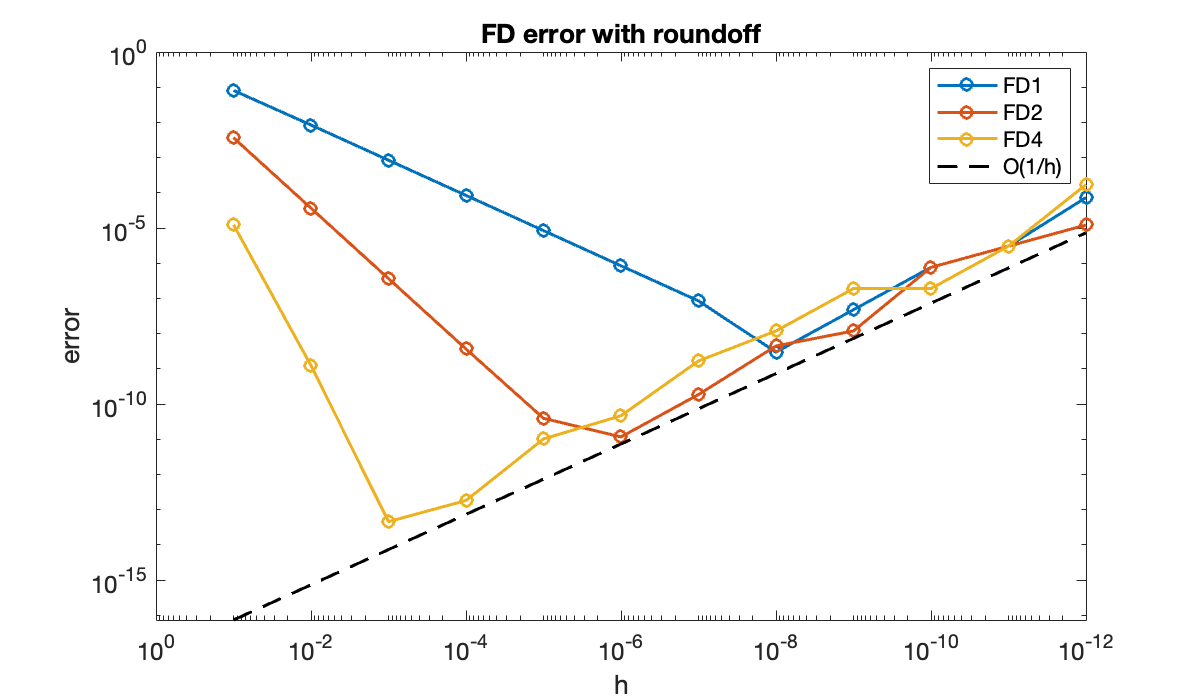

In [3]:
err = abs(FD - exact);
clf
loglog(h, err, "o-")
set(gca, "xdir", "reverse")
order1 = 0.1 * err(end, 1) * (h / h(end)) .^ (-1);
hold on
loglog(h, order1, "k--")
xlabel("h");  ylabel("error")
title("FD error with roundoff")
legend("FD1", "FD2", "FD4", "O(1/h)", "location", "northeast");

Again the graph is made so that $h$ decreases from left to right. The errors are dominated at first by truncation error, which decreases most rapidly for the fourth-order formula. However, increasing roundoff error eventually equals and then dominates the truncation error as $h$ continues to decrease. As the order of accuracy increases, the crossover point moves to the left (greater efficiency) and down (greater accuracy).